In [1]:
import numpy as np
import pandas as pd
import random
import io
import scipy.stats as st

In [2]:
datos = pd.read_csv('./mexico_eco.csv')

In [5]:
datos.sample(3, random_state=3)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
109,109,"19.4333600229,-99.1289519995","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",006_003_06,Cuautémoc,A,Museo,José Luis Cuevas
61,61,"19.4343847692,-99.125125489","{""type"": ""Polygon"", ""coordinates"": [[[-99.1257...",005_140_01,Cuauhtémoc,B,Mercado,Mixcalco
15,15,"19.42413788,-99.1324515","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",307_153_11,Cuautémoc,B,Hotel,San Lucas


In [6]:
#Funcion que toma un dataset y aquellos datos que coinsiden con el indice que recorta
def sistematic_sampling(data, step):
    indexes = np.arange(0, len(data), step=step)
    sistematic_sample = data.iloc[indexes]
    return sistematic_sample

In [9]:
sistematic_sampling(datos, 4).head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real
8,8,"19.4343402009,-99.148212127","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_014_17,Cuautémoc,B,Hotel,Ambassador
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
16,16,"19.436811768,-99.1342853473","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_092_29,Cuautémoc,A,Hotel,República


In [15]:
#Crea una nueva columa compuesta conformada por la columna de delegacion y tipo
datos['estratificado'] = datos['delegacion'] + ", " + datos['tipo']
#Me muestra la proporcion de aparicion en el conjunto de datos, para cada variante de la columna compuesta
(datos['estratificado'].value_counts() / len(datos) * 100 ).sort_values(ascending=False)

estratificado
Cuautémoc, Hotel                64.347826
Cuautémoc, Museo                15.652174
Venustiano Carranza, Hotel       7.826087
Cuauhtémoc, Mercado              7.391304
Venustiano Carranza, Mercado     4.782609
Name: count, dtype: float64

In [20]:
def data_estratificada(data, nombres_columnas_estrat, valores_estrat, prop_estrat, random_state=None):
    df_estrat = pd.DataFrame(columns=data.columns)  # Creamos un DataFrame vacío con las mismas columnas que data
    
    pos = -1
    for i in range(len(valores_estrat)):  # Iteración sobre los valores estratificados
        pos += 1
        if pos == len(valores_estrat) - 1:
            ratio_len = len(data) - len(df_estrat)  # Calculamos el número de filas para que coincida con el total original
        else:
            ratio_len = int(len(data) * prop_estrat[i])  # Calculamos el número de filas según la proporción deseada
        
        # Filtramos los datos originales según los valores seleccionados en la estratificación
        df_filtrado = data[data[nombres_columnas_estrat] == valores_estrat[i]]
        
        # Hacemos un muestreo aleatorio con reemplazo usando la proporción calculada
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state)
        
        # Concatenamos los datos muestreados con el DataFrame estratificado en construcción
        df_estrat = pd.concat([df_estrat, df_temp])
        
    return df_estrat  # Devolvemos los datos estratificados y remuestreados

In [21]:
valores_estrat = datos.estratificado.unique() #['Cuautémoc, Hotel', 'Cuautémoc, Museo', 'Venustiano Carranza, Hotel', 'Cuauhtémoc, Mercado','Venustiano Carranza, Mercado']
prop_estrat = [0.5, 0.2, 0.1, 0.1,0.1] #Proporcion que quiero que me entregue de cada variante
df_estrat = data_estratificada(datos, 'estratificado', valores_estrat, prop_estrat, random_state=42)
df_estrat

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id,estratificado
78,78,"19.4430578017,-99.13614342","{""type"": ""Polygon"", ""coordinates"": [[[-99.1368...",004_107_01,Cuauhtémoc,B,Mercado,La Lagunilla,"Cuauhtémoc, Mercado"
162,162,"19.4452741596,-99.1443205075","{""type"": ""Polygon"", ""coordinates"": [[[-99.1448...",003_044_01,Cuauhtémoc,B,Mercado,Martínez de la Torre,"Cuauhtémoc, Mercado"
129,129,NaN,NaN,005_125_01,Cuauhtémoc,A,Mercado,Abelardo,"Cuauhtémoc, Mercado"
79,79,"19.4299360348,-99.1445730919","{""type"": ""Polygon"", ""coordinates"": [[[-99.1450...",002_047_11,Cuauhtémoc,B,Mercado,San Juan,"Cuauhtémoc, Mercado"
78,78,"19.4430578017,-99.13614342","{""type"": ""Polygon"", ""coordinates"": [[[-99.1368...",004_107_01,Cuauhtémoc,B,Mercado,La Lagunilla,"Cuauhtémoc, Mercado"
...,...,...,...,...,...,...,...,...,...
128,128,"19.4270781084,-99.1210175514","{""type"": ""Polygon"", ""coordinates"": [[[-99.1214...",323_061_04(123),Venustiano Carranza,B,Mercado,San Ciprian,"Venustiano Carranza, Mercado"
37,37,"19.4271233834,-99.125111772","{""type"": ""Polygon"", ""coordinates"": [[[-99.1251...",323_065_01,Venustiano Carranza,B,Mercado,Dulceria,"Venustiano Carranza, Mercado"
163,163,"19.4265454033,-99.1224859032","{""type"": ""Polygon"", ""coordinates"": [[[-99.1231...",323_063_05,Venustiano Carranza,B,Mercado,NaN,"Venustiano Carranza, Mercado"
156,156,"19.4255480371,-99.1249308096","{""type"": ""Polygon"", ""coordinates"": [[[-99.1253...",323_138_04 (3),Venustiano Carranza,B,Mercado,Mariscos,"Venustiano Carranza, Mercado"


In [39]:
def var(datos, p_m='p'):
    xm = datos.sum() / len(datos)
    sumatoria = 0
    for xi in datos:
        sumatoria += (xi - xm)**2
    if p_m == 'p':
        return  sumatoria / len(datos)
    else:
        return sumatoria / (len(datos) - 1)

def std(var):
    return var** 0.5

In [41]:
var(np.array([12,3,4,4]), 'm')

17.583333333333332

In [42]:
std(var(np.array([12,3,4,4]), 'm'))

4.193248541803041

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
url = './archive.ics.uci.edu_ml_machine-learning-databases_iris_iris.data.txt'
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
iris = pd.read_csv(url,names = names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Grafico de variables de iris

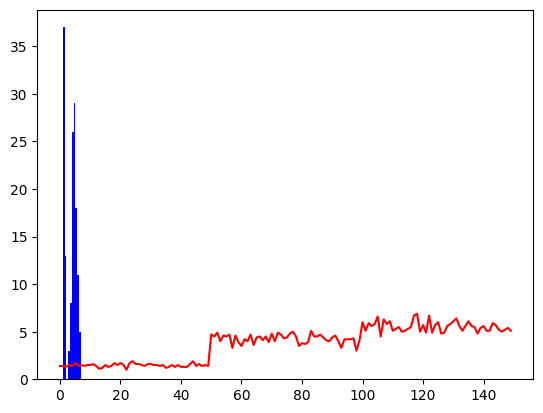

In [57]:
plt.plot(iris['petal-length'], 'r')
plt.hist(iris['petal-length'],color='b')
plt.show()

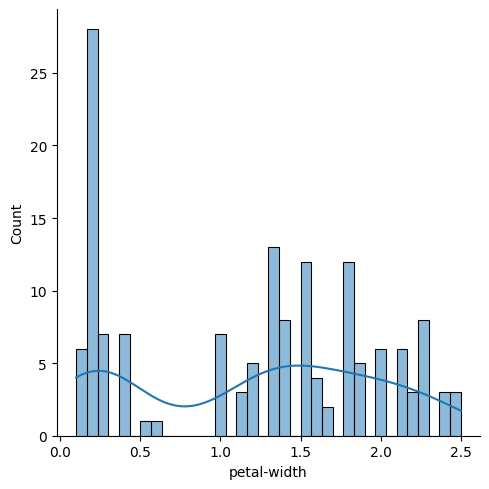

In [63]:
sns.displot(iris['petal-width'],kde=True,  bins=int(180/5))

In [66]:
iris['petal-length'].var()

3.113179418344519

In [67]:
var(iris['petal-length'], 'p')

3.092424888888889

In [69]:
iris['petal-length'].std()

1.7644204199522626

In [68]:
std(var(iris['petal-length'], 'p'))

1.7585291834055212

In [71]:
df = pd.read_csv('./world-data-2023.csv')

In [72]:
df.sample(3, random_state=3)

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
34,Chad,13,TD,39.70%,"1,284,000","35,000",42.17,235.0,N'Djamena,"1,016",...,56.40%,0.04,"15,946,876",70.70%,NaN,63.50%,1.89%,"3,712,273",15.454166,18.732207
25,Bulgaria,64,BG,46.30%,"110,879","31,000",8.90,359.0,Sofia,"41,708",...,47.70%,4.03,"6,975,761",55.40%,20.20%,28.30%,4.34%,"5,256,027",42.733883,25.485830
14,Barbados,668,BB,23.30%,430,"1,000",10.65,1.0,Bridgetown,"1,276",...,45.20%,2.48,"287,025",65.20%,27.50%,35.60%,10.33%,"89,431",13.193887,-59.543198


In [81]:
import numpy as np

In [83]:
(df.columns)

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt

In [20]:
random.seed(20)
var1 = np.random.randint(0,10,10)
var2 = var1 + np.random.normal(0,1,10)

In [21]:
import seaborn as sns

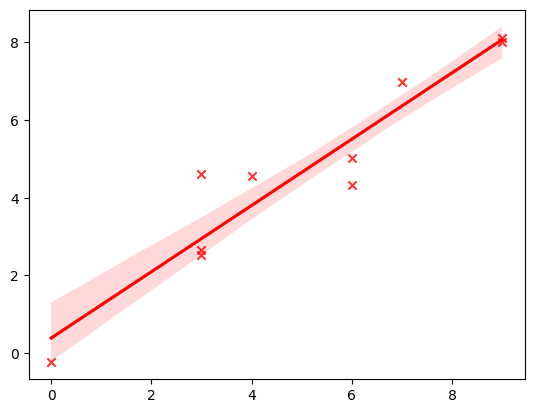

In [41]:
import seaborn as sns

# Assuming var1 and var2 are your data variables

# Create a scatter plot with a regression line
grafico = sns.regplot(x=var1, y=var2, scatter=True, ci=80, color='red', marker='x')



# Show the plot
plt.show()


In [57]:
vacaciones = list(zip(var1, var2))

In [60]:
tabla = pd.DataFrame(data=vacaciones, columns=['dias_vacaciones', 'dinero_gastado'])

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st

# Establecer una semilla para la generación de números aleatorios para reproducibilidad
np.random.seed(20)

# Generar datos aleatorios para días de vacaciones y dinero gastado
var1 = np.random.randint(0, 10, 10)
var2 = var1 + np.random.normal(0, 1, 10)

# Crear una lista de tuplas que representen los datos de vacaciones
vacaciones = list(zip(var1, var2))

# Crear un DataFrame con los datos de vacaciones
tabla = pd.DataFrame(data=vacaciones, columns=['dias_vacaciones', 'dinero_gastado'])

nivel_confianza = 0.80
grados_libertad = len(tabla) - 1
media = np.mean(tabla['dinero_gastado'])  # Calcular la media de 'dinero_gastado'
error_estandar = st.sem(tabla['dinero_gastado'])  # Calcular el error estándar de 'dinero_gastado'

# Calcula el intervalo de confianza
intervalo_confianza = st.t.interval(
    nivel_confianza,
    df=grados_libertad,
    loc=media,
    scale=error_estandar
)

print("Intervalo de Confianza:", intervalo_confianza)


Intervalo de Confianza: (3.627419770418782, 6.080785973965029)


1. Establecer una hipotecis nula y una hipotesis alternativa 
2. Seleccionar el nivel de significancia o nivel de confianza con el que se obtendran los resultados 
3. Seleccionar el estadistico de prueba. 
4. Formular la regla de desicion. 
5.Interpretar los resultados y tomar una desicion